## Исследование данных о российском кинопрокате.

### Основная задача.

Изучить рынок российского кинопроката и выявить текущие тренды.

### Краткое описание. 

Заказчик этого исследования — Министерство культуры Российской Федерации.

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим особое внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

### Краткий план.

1. Изучим данные и выявим возможные ошибки;
2. Произведем обработку данных;
3. Добавим необходимую информацию в датафрейм;
4. Проведем необходимые вычисления и визуализируем рез-ты; 
5. Проведем исследовательский анализ данных; 
6. Проведем обособленный анализ фильмов получивших государственную поддержку; 
7. Напишем общий вывод в соответствии с полученными данными.

### Описание данных. 

- Файл mkrf_movies с информацией о данных о прокатных удостоверениях:

1. title - Название фильма;
2. puNumber - Номер прокатного удостоверения;
3. show_start_date - Дата премьеры фильма;
4. type - Тип  фильма;
5. film_studio - Студия-производитель; 
6. production_country - Страна-производства;
7. director - Режиссер;
8. producer - Продюсер; 
9. age_restriction - Возрастная категория; 
10. refundable_support - Объём возвратных средств государственной поддержки;
11. nonrefundable_support - Объём невозвратных средств государственной поддержки;
12. budget - Общий бюджет фильма; 
13. financing_source - Источник государственного финансирования; 
14. ratings - Рейтинг фильма на КиноПоиске; 
15. genres - жанр фильма. 

- Файл mkrf_shows с информацией о данных о прокате в российских кинотеатрах:

1. puNumber - Номер прокатного удостоверения; 
2. box_office - Сборы в рублях.

### Обзор данных.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# считываем данные и избавляемся от экспоненциальных форм
path = 'C:\\Users\\tbyni\\Рабочий стол\\Проекты ЯП_ДА\\Яндекс_4ый_проект_ДА\\'
path_1 = 'C:\\Users\\tbyni\\Рабочий стол\\Проекты ЯП_ДА\\Яндекс_4ый_проект_ДА\\'
mkrf_movies = pd.read_csv(path + 'mkrf_movies.csv', sep = ',')
mkrf_shows = pd.read_csv(path_1 + 'mkrf_shows.csv', sep = ',')
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# общая информацию о данных ('mkrf_movies')  
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# кол-во пропущенных значений в mkrf_movies
mkrf_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [5]:
# общие данные в таблице mkrf_movies
mkrf_movies.describe()

,refundable_support,nonrefundable_support,budget
count,332.00,332.00,332.00
mean,"11,864,457.83","48,980,988.89","127,229,716.68"
std,"24,916,555.26","59,980,117.92","188,588,333.12"
min,0.00,0.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00"
50%,0.00,"30,000,000.00","68,649,916.00"
75%,"15,000,000.00","40,375,000.00","141,985,319.50"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00"


In [6]:
# просмотриваем первые 5 строк mkrf_movies
mkrf_movies.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
# общая информация о данных  
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
# общие данные в таблице mkrf_shows
mkrf_shows.describe()

,puNumber,box_office
count,"3,158.00","3,158.00"
mean,"120,187,475.32","76,478,696.16"
std,"12,383,941.15","240,353,122.82"
min,"111,000,113.00",0.00
25%,"113,000,191.75","86,239.00"
50%,"121,013,114.50","2,327,987.55"
75%,"121,028,317.75","23,979,671.02"
max,"224,026,410.00","3,073,568,690.79"


In [9]:
# # просмотриваем первые 5 строк mkrf_shows
mkrf_shows.head(5)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [10]:
# кол-во пропущенных значений mkrf_shows 
mkrf_shows.isna().sum()

puNumber      0
box_office    0
dtype: int64

In [11]:
# обрабатываем столбец puNumber для дальнейшего объединения таблиц
mkrf_movies.value_counts([mkrf_movies['puNumber'] == 'нет'])
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].replace('нет', '0') # заменяем строковые значения на 0.
mkrf_movies.value_counts([mkrf_movies['puNumber'] == 'нет']) # check.
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int) # замена типа данных.  

In [12]:
# объединяем таблицы в 1 по столбцу puNumber таблицы mkrf_shows. 
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [13]:
# общая информация объединенной таблицы 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
# первые 5 строк объединенной таблицы
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


- Собрана консолидированная таблица для исследования;
- В данных всего 7486 строк; 
- Пропуски имеются в следующих столбцах: film_studio, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office;
- Зависимость по столбцам puNumber в ранее объединенных таблицах;
- Необходимо изменить тип данных в следующих столбцах: show_start_date, ratings;
- Есть дублирующие названия фильмов. 

## Предобработка данных.

### Проверка типов данных.

Заведомо изменили тип данных в столбце puNumber, теперь необходимо изменить тип данных в столбцах: show_start_date на datetime.

In [15]:
# приводим названия фильмов к нижнему регистру 
df['title'] = df['title'].str.lower()

In [16]:
# производим замену формата на datetime 
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%d')

In [17]:
# избавляемся от аномалий и переводим в формат float
df['ratings'] = pd.to_numeric(df.ratings, errors='coerce')

In [18]:
# создаем столбец с общей суммой гос. поддержки. 
df['full_support'] = df['nonrefundable_support'] + df['refundable_support']

In [19]:
# check 
# df.info()

#### Вывод. 

- Названия в столбце title в нижний регистр; 
- Изменили типы данных для следующих столбцов: show_start_date, ratings;
- Создан столбец с суммой возвратных и не возвратных средств, для дальнейшего исследования; 
- Избавились от аномалий в столбце - ratings. 

### Изучим пропуски в датафрейме.

Проверим пропуски в столбцах и решим, как необходимо заполнить или оставить без изменений. 

In [20]:
# уточняем кол-во пропущенных значений 
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
full_support             7154
dtype: int64

- Ранее мы уже просматривали пропущенные значения по отдельным таблицам, теперь изучаем общий датафрейм. Мы видим следующую ситуацию, минимальное кол-во пропусков в столбцах: film_studio, production_country, director; 

- Большое кол-во пропущенных значений в столбцах: refundable_support, nonrefundable_support, budget, financing_source. Можем предположить, что это связь с гос. поддержкой.

- Потери более 5% в столбцах: 
1) producer - Предполагаем, что это фильмы произведенные в СССР; 
2) ratings, genres - данные схожи, можем предположить, что данные фильмы не были представлены на КиноПоиск; 
3) box_office - в данном случае думаю это обусловенно, что фильмы не были в прокате. 

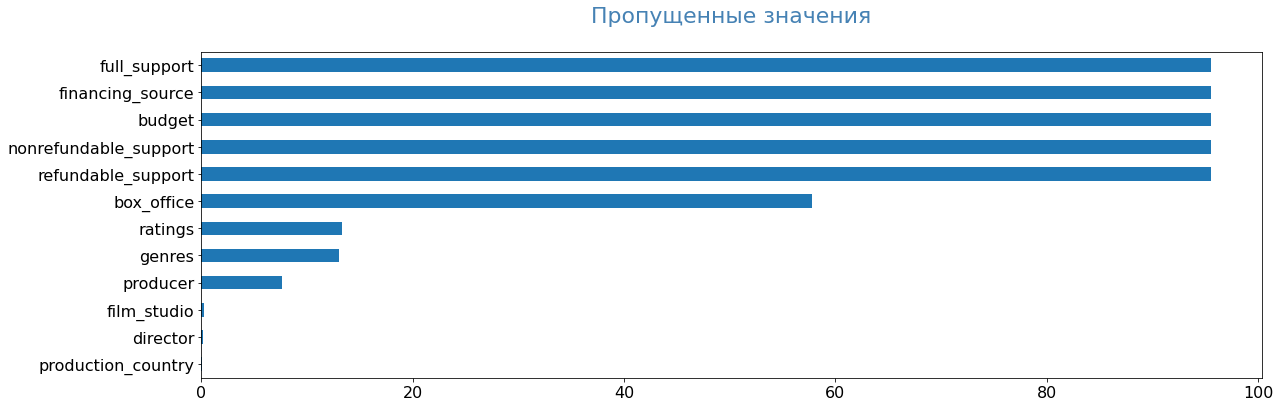

In [21]:
# визуализируем пропущенные значения
def pass_value(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
        .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
    );
pass_value(df)

In [22]:
# nan заменим на пробелы 
df['producer'] = df['producer'].fillna(value = '')
df.head(5) # check

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN


Проверим гипотезу, что отсутствие продюссера связано со страной производства фильма. 

In [23]:
# проверяем, если страна СССР и пропуск в значении 
df.loc[(df['production_country'] == 'СССР') & (df['producer'] == '')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,NaN
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",NaN
11,ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN,NaN
15,председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,драма,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN,NaN
7406,назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN,NaN
7407,перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN,NaN
7408,ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN,NaN


Согласно открытым источникам в СССР, как такового продюссера не было. Был директор фильма, поэтому пропущенные значения заменим на значения из столбца - director. 

In [24]:
# производим замену
df.loc[(df['producer'] == '', 'producer')] = df['director']

In [25]:
# замена прошла успешно 
df[(df['production_country'] == 'СССР')] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,В.Абдрашитов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,NaN
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,В.Меньшов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",NaN
11,ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,М.Туманишвили,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN,NaN
15,председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,А.Салтыков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,драма,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,Г.Кузнецов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN,NaN
7406,назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Я.Лапшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN,NaN
7407,перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Я.Лапшин,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN,NaN
7408,ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,О.Николаевский,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN,NaN


In [26]:
# проверяем оставшиеся пропуски 
df['producer'].isna().sum()

4

In [27]:
# check
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                    4
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
full_support             7154
dtype: int64

In [28]:
# проверяем корректность данных. 
df.query('financing_source in ("Министерство культуры", "Фонд кино" )' and 'production_country in ("Россия")').count()

title                    1821
puNumber                 1821
show_start_date          1821
type                     1821
film_studio              1805
production_country       1821
director                 1818
producer                 1818
age_restriction          1821
refundable_support        316
nonrefundable_support     316
budget                    316
financing_source          316
ratings                  1279
genres                   1291
box_office                778
full_support              316
dtype: int64

#### Вывод

- film_studio, production_country, director - потери данных минимальны на исследование не повлияет;
- Выявили пропуски в столбце producer предположили, что это связано с тем, что в СССР не было продюссеров, заполнили данными из столбца director; 
- financing_source, refundable_support, nonrefundable_support, budget в данном случае большое кол-во пропусков обеспечено не полнотой информации, но мы предположили, что данные предоставлены только по фильмам произведенным в РФ с гос. поддержкой;
- Столбец ratings ранее перевели в иной формат и исправили значения с %, заполнять пропуски не имеет смысла, т.к либо фильм не выходил на кинопоиске, либо предоставлены не все данные и надо запросить у коллег;
- Возможно, что пропуски в столбце genres связаны с пропусками в столбце ratings, фильмы не выходили на КиноПоиске поэтому нет и жанра;
- В столбце box_office большое кол-во пропусков предположим, что фильмы просто не выходили в прокат в РФ.

### Изучим дубликаты в датафрейме.
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [29]:
# изучим наличие дубликатов в title 
df.duplicated(['title']).sum()

724

In [30]:
# визуализируем 
duplicated_df = df[df['title'].duplicated()].head(10)
duplicated_df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
41,алекс и эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN,NaN
110,гарри поттер и орден феникса /по роману дж.к.р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00",NaN
113,гарри поттер и узник азкабана /по роману дж.к....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00",NaN
122,гарри поттер и кубок огня /по роману дж.к.ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"фэнтези,приключения,семейный","843,310.00",NaN
132,джейн эйр /по одноименному роману шарлотты бро...,221035716,2016-06-07 12:00:00+00:00,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...",Франция - Италия - Великобритания - США,Франко Дзеффирелли,Франко Дзеффирелли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"драма,мелодрама",NaN,NaN
205,кинг конг _,221001815,2015-02-11 12:00:00+00:00,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингН...",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"боевик,драма,мелодрама",NaN,NaN
268,пуленепробиваемый.,121009103,2013-03-13 12:00:00+00:00,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайн...",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"фэнтези,боевик,комедия",NaN,NaN
379,рапунцель: запутанная история,224026712,2012-10-23 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",NaN,NaN


In [31]:
# изучаем наличие дубликатов в puNumber
df.duplicated(['puNumber']).sum()

2

In [32]:
# визуализируем
duplicated_d = df[df['puNumber'].duplicated()].head(20)
duplicated_d

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,full_support
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN,NaN
5068,анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN,NaN


In [33]:
 # Задачи удалить дубликаты нет, но пропишу, чтобы если нам это понадобится воспользоваться. 
 # df = df.drop_duplicates(['title']).reset_index(drop=True) 
 # df[df['title'].duplicated(keep=False)]
 # df.duplicated(['title']).sum()

Проверяем два наиболее важных для нашего исследования столбца - title и puNumber: 

В данном случае может быть несколько причин возникновения дубликатов: 
- Человеческий фактор (неверное заполнение данных); 
- Технический фактор (сбои в системе, как например судя по всему в столбце puNumber);
- В столбце с фильмами мы увидели, что дублям может способствовать, то фильмы бывают многосерийными.

Удалять дубликаты в puNumber нет смысла, т.к эти фильмы не несут для нас ценности.

### Изучим категориальные значения.

In [34]:
# проверим данные age_restriction 
df['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [35]:
# проверим данные film_studio 
df['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [36]:
# проверяем данные financing_source 
df['financing_source'].sort_values().unique()

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

In [37]:
# проверяем данные genres 
df['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [38]:
# проверяем данные type
df['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [39]:
# исправляем проблемные значения. 
df['type'] = df['type'].str.strip()
df['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

Заметим, что в категориальных значениях: 

- Очень много повторяющихся значений, как например в жанрах очень много пересечений, что усложняет сортировку; 
- Присутствуют пробелы данных; 

### Проверим количественные значения

In [40]:
# обзор данных 
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,full_support
count,"7,486.00",332.00,332.00,332.00,"6,490.00","3,158.00",332.00
mean,"135,178,527.64","11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16","60,845,446.72"
std,"38,382,177.41","24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82","72,755,459.47"
min,0.00,0.00,0.00,0.00,1.00,0.00,"3,000,000.00"
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00","25,333,750.00"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55","35,000,000.00"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02","60,000,000.00"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79","500,000,000.00"


In [41]:
# проверим, где в данных гос. поддержка превышает бюджет 
df.query('full_support > budget').count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
full_support             17
dtype: int64

In [42]:
# заменим данные, где бюджет = 0, на сумму гос. поддержки
df.loc[(df['budget'] == 0, 'budget')] = df['full_support']
df.query('full_support > budget').count()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
full_support             0
dtype: int64

(0.0, 373568690.79)

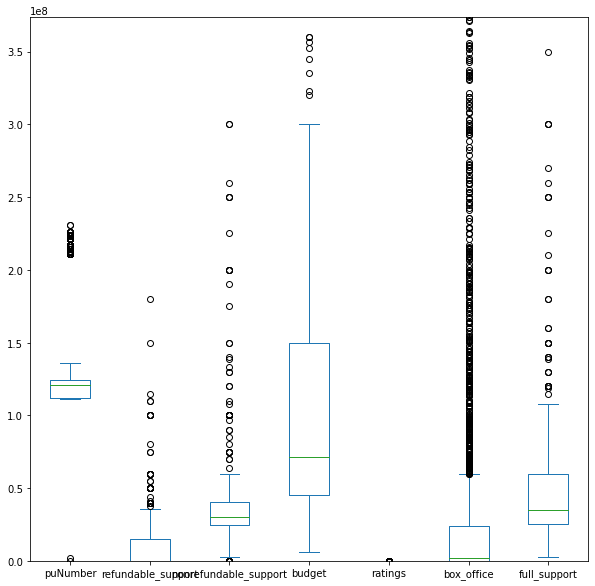

In [43]:
# строим диаграмму размаха
df.plot(kind='box', figsize=(10, 10))
plt.ylim(0, 373568690.79)

#### Вывод: 
Обнаружили следующее: 

- Большое кол-во нулей в данных; 
- Бюджет некоторых фильмов был меньше чем гос. поддержка, заполнили данные общей суммой гос. поддержки;
- Данные в рейтинге стали адекватными;
- Построили диаграмму размаха:
 - Большие выбросы в столбце box_office обусловлены, что информации за ранние года практически, а далее с ростом гос. поддержки росла и выручка; 
 - Так же из важных столбцов наблюдаем выбросы: nonrefundable_support, refundable_support, full_support весьма в большом кол-ве так же думаю это обусловленно кол-вом данных за года; 
 - В данных по бюджету выбросы минимальны. 

### Добавим новые столбцы.

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [44]:
# столбец с годом 
df['year_start_date'] = df['show_start_date'].dt.year

In [45]:
# столбцы с главным режиссером и жанром 
df['main_director'] = df['director'].str.split(',', 1).str[0]
df['main_genres'] = df['genres'].str.split(',', 1).str[0]
 # df.head(20)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [46]:
# доля составялет гос. поддержка от общего бюджета фильма
df['part_support'] = (df['full_support'] / df['budget'] * 100).round()/100

In [47]:
 # Check
df.query('part_support > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,full_support,year_start_date,main_director,main_genres,part_support
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,0.33
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00","26,000,000.00",2014,А.Якимчук,NaN,0.70
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,0.61
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",2019,А.Кравчук,история,0.51
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00",2019,Д.Шмидт,мультфильм,0.53
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,"500,000,000.00",2019,Ф.Бондарчук,фантастика,0.53
7476,я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,NaN,"30,000,000.00",2019,И.Северов,драма,0.65


#### Вывод

- Данные подготовлены для проведения анализа данных:
  - Добавлены все необходимые столбцы;
  - Выделен год выхода фильма;
  - подсчитан процент предоставленных государством средств  от бюджета. 

## Исследовательский анализ данных.

- Посмотрим, сколько фильмов выходило в прокат каждый год;
- Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [48]:
# свобная таблица по колву фильмов и фильмов с данными по прокату 
comparing = pd.pivot_table(df, index=['year_start_date'], values=['title','box_office'], aggfunc='count')

In [49]:
# столбец с долей по годам 
comparing['parts'] = comparing['box_office'] / comparing['title']
comparing

,box_office,title,parts
year_start_date,,,
2010,105,985,0.11
2011,109,622,0.18
2012,128,593,0.22
2013,184,630,0.29
2014,279,807,0.35
2015,465,705,0.66
2016,526,818,0.64
2017,357,505,0.71
2018,475,891,0.53


<AxesSubplot:title={'center':'Сумма поддержки по годам'}, xlabel='year_start_date'>

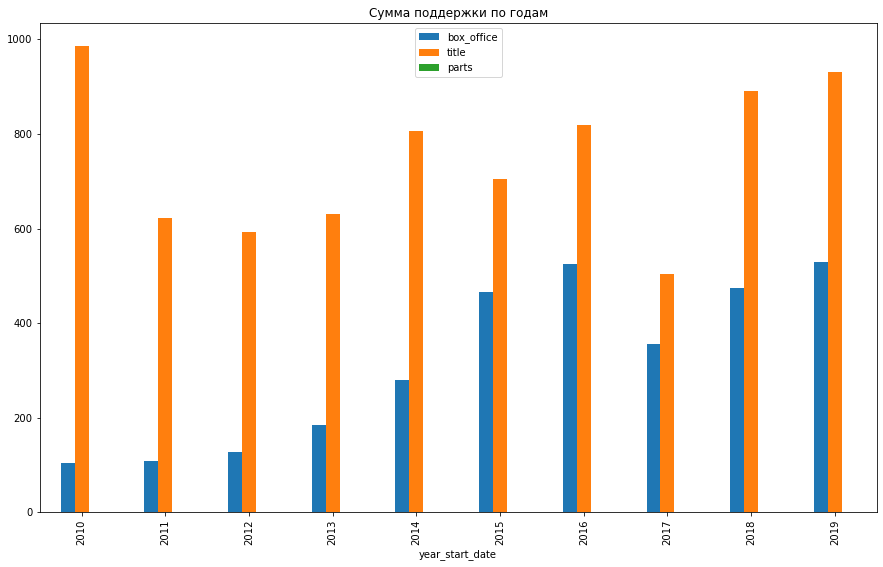

In [50]:
# визуализируем. 
comparing.plot(kind = 'bar', figsize = (15,9), title = 'Сумма поддержки по годам')

- Выявили следующее: 

 - Ежегодно в кинопрокат выходит порядка 600 - 900 фильмов;
 - Интересно, что в 2010 году за который очень мало информации вышло наибольшее кол-во фильмов; 
 - Начиная с 2015 года мы видим стабильное увеличение фильмов с указанной информацией о прокате в кинотеатрах. 
 
- Подводя итог под информацией выше, можем предположить, что с увеличением финансирования кинематографа растет и контроль за расходованием средств. 

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года;
- Изучим, как менялась динамика проката по годам;
- Просмотрим в каком году сумма сборов была минимальной, а в каком максимальной.

,mean,count,median,sum
year_start_date,,,,
2018,"104,565,059.23",475,"8,891,102.21","49,668,403,134.32"
2017,"136,032,793.33",357,"9,968,340.00","48,563,707,217.51"
2019,"91,369,261.85",530,"4,627,798.34","48,425,708,779.59"
2016,"91,000,569.85",526,"3,846,679.41","47,866,299,741.91"
2015,"84,940,570.31",465,"4,920,933.00","39,497,365,196.40"
2014,"26,684,415.27",279,"18,160.00","7,444,951,859.20"
2013,"161,954.92",184,"3,522.50","29,799,706.20"
2011,"129,383.17",109,"3,000.00","14,102,765.00"
2012,"54,339.24",128,"5,660.00","6,955,423.00"


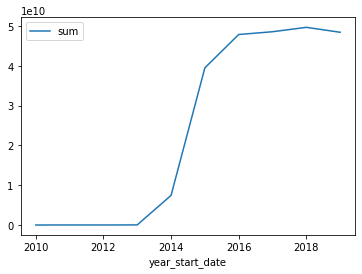

In [51]:
# сводная таблица по годам 
compare_box = df.pivot_table(index = 'year_start_date', values = 'box_office', aggfunc = ['mean', 'count', 'median', 'sum'])
compare_box.columns = ['mean', 'count', 'median', 'sum']
compare_box.plot(y = 'sum')
compare_box.sort_values('sum', ascending = False)

-  Определили среднее, медиану и сумму сборов для каждого года; 
-  Начиная с 2015 года сумма заметно растет и достигает своих пиковых значений в 2018 году, но как известно из открытых данных в интернете, 2019 год по сравнению с 2018 дал более существенные сборы, думаю данные за 2019 год предоставлены не полностью; 
- Минимальная сумма согласно данным была в 2010 году, максимальная в 2018. 
- Стоит отметить, что с 2010 по 2013 имеются очень показатели, скорее всего это обусловленно неполнотой картины, т.к мы видели на диаграмме размаха огромные выбросы.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год;
- Проверим с каким возрастным ограничением фильмы собрали больше всего денег в прокате;
- Уточним меняется ли картина в зависимости от года.

In [52]:
# уникальные значения age_restriction 
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [53]:
# откоректируем возрастные категории
def category(row):
    if '«16+» - для детей старше 16 лет' in row:
        return '16+'
    if '«0+» - для любой зрительской аудитории' in row:
        return '0+'
    if '«18+» - запрещено для детей' in row:
        return '18+'
    if '«12+» - для детей старше 12 лет' in row:
        return '12+'
    if '«6+» - для детей старше 6 лет' in row:
        return '6+'
df['age_restriction'] = df['age_restriction'].apply(category)
 # df['age_restriction'].value_counts()

In [54]:
# сводная таблица по годам и возрастным категориям - сборы в рублях 
data_pivot = df.pivot_table(index='age_restriction', columns='year_start_date', values='box_office', aggfunc='sum')
data_pivot

year_start_date,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,,,,
0+,"1,887,611.00","13,499,871.00","2,266,483.00","2,710,302.50","375,562,258.20","379,054,578.37","150,228,848.67","229,598,930.00","32,449,002.11","17,746,066.82"
12+,"120,146.00","219,891.00","108,734.00","20,910,336.50","2,584,782,324.00","13,616,082,008.91","12,204,446,524.39","7,851,427,660.67","14,267,291,660.69","12,680,198,773.67"
16+,"366,512.00","381,513.00","3,254,216.00","658,069.60","544,280,086.70","11,368,120,870.27","16,664,548,541.74","18,745,042,900.06","16,503,602,346.96","12,753,418,984.60"
18+,"54,385.00","1,040.00","182,580.00","5,161,245.60","2,209,712,746.90","5,432,308,367.44","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64"
6+,NaN,450.00,"1,143,410.00","359,752.00","1,730,614,443.40","8,701,799,371.41","12,053,146,008.24","12,086,142,145.76","10,104,974,623.41","12,852,548,650.86"


<AxesSubplot:title={'center':'Сумма поддержки по годам'}, xlabel='age_restriction'>

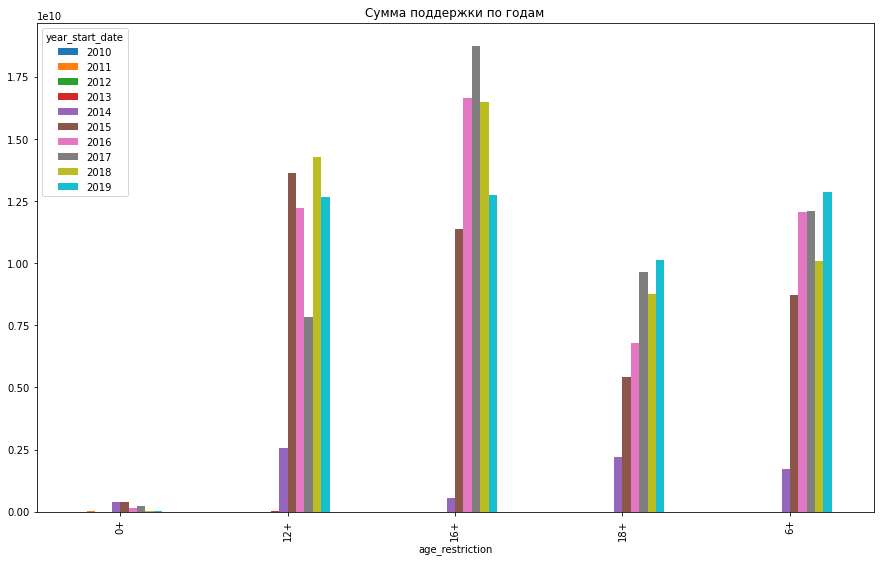

In [55]:
# визуализируем полученные данные
data_pivot.plot(kind = 'bar', figsize = (15,9), title = 'Сумма поддержки по годам')

In [56]:
# сводная таблица по годам и возрастным категориям - средние сборы в рублях
mean_pivot = df.pivot_table(index='age_restriction', columns='year_start_date', values='box_office', aggfunc='mean')
mean_pivot

year_start_date,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,,,,
0+,"85,800.50","449,995.70","75,549.43","73,251.42","9,883,217.32","9,719,348.16","3,664,118.26","76,532,976.67","6,489,800.42","5,915,355.61"
12+,"7,067.41","9,995.05","6,795.88","348,505.61","30,771,218.14","186,521,671.35","148,834,713.71","191,498,235.63","212,944,651.65","149,178,809.10"
16+,"6,319.17","7,065.06","66,412.57","14,623.77","6,637,562.03","67,667,386.13","91,563,453.53","154,917,709.92","105,792,322.74","71,648,421.26"
18+,"6,798.12",520.00,"10,740.00","322,577.85","49,104,727.71","41,153,851.27","44,992,912.71","65,656,432.52","48,939,025.15","55,310,362.31"
6+,NaN,450.00,"71,463.12","13,836.62","57,687,148.11","164,184,893.80","172,187,800.12","268,580,936.57","148,602,567.99","158,673,440.13"


<AxesSubplot:title={'center':'Средняя сумма поддержки по годам'}, xlabel='age_restriction'>

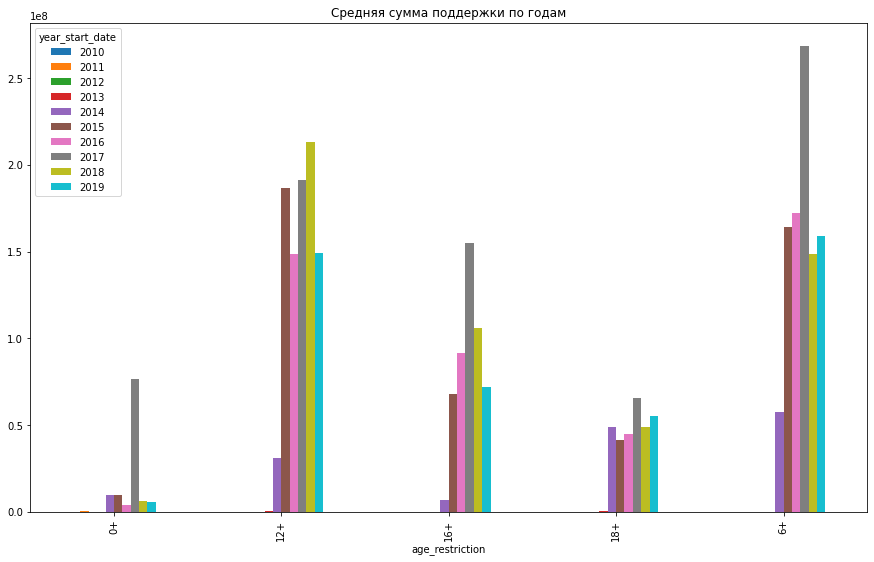

In [57]:
# визуализируем полученные данные 
mean_pivot.plot(kind = 'bar', figsize = (15,9), title = 'Средняя сумма поддержки по годам')

- Судя по полученным данным, предположим, что в 2019 году предоставлены не все данные, т.к судя по открытым источникам в интернете прокат показывал увеличение, ко всему прочему мы сравнили общую сумму и среднее, особой разницы нет;
- Сравнивая общую сумму сборов и средние сборы, видим тенденцию, что стабильно растут 3 категории:  
 - 12+, 16+, 6+.
- Самые низкие показатели у категории 0+, думаю здесь обусловленно тем, что в эту категорию попадают в основном мультики и ходят в основном люди с семьей в выходные.

В целом стоит отметить, что сборы в РФ показывают ежегодную положительную динамику.

### Исследуем фильмы, которые получили государственную поддержку.

In [58]:
# просмотрим кем и сколько выделялось невозвратных средств. 
df_allrefundable_support = df.pivot_table(index='financing_source', columns='year_start_date', values=['full_support'], aggfunc='sum')
df_allrefundable_support

full_support                 \
year_start_date                            2013           2014   
financing_source                                                 
Министерство культуры             26,500,000.00 211,500,000.00   
Министерство культуры, Фонд кино            NaN 159,502,299.00   
Фонд кино                        107,847,945.00 201,000,000.00   

                                                                    \
year_start_date                              2015             2016   
financing_source                                                     
Министерство культуры            1,100,810,000.00   749,851,000.00   
Министерство культуры, Фонд кино   319,382,174.00   469,200,000.00   
Фонд кино                        2,236,049,285.00 3,084,104,482.00   

                                                                    \
year_start_date                              2017             2018   
financing_source                                                     
Министерство культуры              351,000,000.00   926,000,000.00   
Министерство культуры, Фонд кино    64,346,881.00    55,000,000.00   
Фонд кино                        2,768,624,781.00 2,465,969,465.00   

                                                   
year_start_date                              2019  
financing_source                                   
Министерство культуры            1,471,000,000.00  
Министерство культуры, Фонд кино   118,000,000.00  
Фонд кино                        3,315,000,000.00

Мы получили следующее: 

 - Наблюдается ежегодный рост финансирования; 
 - Есть задвоение, где оба управления указаны в 1 категорию (возможно это совместные проекты);

Здесь можем увидеть ежегодный рост. Средства выделяются стабильно с ежегодной индексацией. Отметим всплеск в 2016, здесь все обьяснимо 2016 год был обьявлен годом российского кино. И после спада в 2017 году вновь наблюдается динамика роста. 

In [59]:
# просмотрим зависимость гос. поддержки, общего бюджета и режисера. 
top_dir = df.query('ratings != 0' and 'production_country in ("Россия")' and 'full_support > 0')
top_dir.pivot_table(index=['main_director', 'genres'] , values=['full_support', 'box_office'] ).sort_values(by='full_support', ascending=False).head(20)

,,box_office,full_support
main_director,genres,,
Ф.Бондарчук,"фантастика,боевик",NaN,"500,000,000.00"
А.Кравчук,"история,биография,драма","717,703,185.53","500,000,000.00"
А.Мизгирев,драма,"364,285,139.60","450,000,000.00"
Н.Лебедев,"драма,триллер,приключения","1,402,255,390.00","442,104,482.00"
А.Мегердичев,"спорт,драма","2,779,686,144.00","400,000,000.00"
И.Шурховецкий,"история,боевик,фэнтези","590,405,065.00","350,000,000.00"
Н.Хомерики,драма,"337,069,662.80","300,000,000.00"
А.Учитель,"фэнтези,комедия,семейный","511,775,548.00","300,000,000.00"
Н.Хомерики,"детектив,триллер,криминал","55,876,887.40","300,000,000.00"


Выделили 20 режиссеров с максимальной поддержкой от гос-ва:

- Нет четкой зависимости между суммой выделяемых средств и сборами, да А.Кравчук получил самую большую поддержку и весьма большие сборы на фоне других, но Н.Лебедев и А.Мегердичев имея меньшую поддержку получили больше сборов;
- Все 20 топовых практически всегда окупают минимум предоставленные средства; 
- Наиболее востребованные жанры в РФ: история, драма, военный, спорт.

In [60]:
# фильмы с максимальной гос. поддержкой
top_rating = df.query('ratings != 0' and 'production_country in ("Россия")' and 'full_support > 0' and 'ratings < 10')
top_rating.pivot_table(index=['title', 'genres'] , values=['full_support', 'box_office', 'ratings', 'budget'] ).sort_values(by='full_support', ascending=False).head(20)

,,box_office,budget,full_support,ratings
title,genres,,,,
вторжение,"фантастика,боевик",NaN,"944,000,000.00","500,000,000.00",5.70
союз спасения,"история,биография,драма","717,703,185.53","980,000,000.00","500,000,000.00",6.00
дуэлянт,драма,"364,285,139.60","684,200,536.00","450,000,000.00",6.60
экипаж .,"драма,триллер,приключения","1,402,255,390.00","635,283,867.00","442,104,482.00",7.60
движение вверх,"спорт,драма","2,779,686,144.00","590,192,191.00","400,000,000.00",7.50
легенда о коловрате,"история,боевик,фэнтези","590,405,065.00","500,012,729.00","350,000,000.00",6.40
ледокол,драма,"337,069,662.80","430,000,000.00","300,000,000.00",6.50
матильда,"фэнтези,комедия,семейный","511,775,548.00","1,032,905,957.00","300,000,000.00",7.70
девятая,"детектив,триллер,криминал","55,876,887.40","453,704,666.00","300,000,000.00",5.80


- Средний рейтиг топовых фильмов в районе - 7; 
- Отметим, что окупаемость у фильмов низкая, т.к даже в топ 20 есть фильмы не окупившие выделенные средства;
- На примере сравнения 2х фильмов, а именно "Притяжение" которое получило рейтинг 5.60, однако польстью окупился и даже принес прибыль и "Большой" который имеет рейтинг 8.50, однако фильм убыточеню

## Общий вывод.

После изучения рынка российского кинопроката выявлено следующее:

- Гос. поддержка российского кинематографа ежегодно увеличивается; 
- Кассовые сборы с каждым годом показывают небольшой рост (кроме 2019 года, предположили, что данные предоставленны не в полном объеме); 
- Наибольшие кассовые сборы стабильно показывают фильмы с категорией "12+", "16+", "6+"; 
- Наибольшую поддержку, оказывает Министерство культуры; 
- Между кассовыми сборами и гос. поддержкой нет четкой зависимости;
- Средний рейтиг фильмов РФ в районе 7.0;
- Зачастую фильмы убыточны в производстве;  
- С ростом финансирования растет и контроль за расходованием средств, отсюда увеличение информации о фильмах вышедших в прокат.

По итогу можем рекомендовать оказывать поддержку больше историческим и приключенческим фильмам, т.к данные фильмы стабильно показывают высокие сборы, такие как - салют-7, т-34.